<a href="https://colab.research.google.com/github/muhiqbalalamin/DeepLearning/blob/main/CNN_MLP_SVHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow
CNN & MLP model Using SVHN Datasets

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
def preprocess(features):
    image = tf.image.convert_image_dtype(features['image'], tf.float32)
    image = tf.image.random_flip_left_right(image)  # Data Augmentation
    label = tf.one_hot(features['label'], 10)  # SVHN has 10 classes
    return image, label

# Load SVHN dataset
dataset_train = tfds.load("svhn_cropped", split="train", as_supervised=False)
dataset_test = tfds.load("svhn_cropped", split="test", as_supervised=False)

dataset_train = dataset_train.map(preprocess).batch(64).prefetch(tf.data.experimental.AUTOTUNE)
dataset_test = dataset_test.map(preprocess).batch(64).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# Define CNN Model
cnn_model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Adjusted for SVHN (10 classes)
])

cnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Define MLP Model
mlp_model = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Adjusted for SVHN (10 classes)
])

mlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Plot accuracy and loss
def plot_metrics(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"{title} Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"{title} Loss")
    plt.show()

Training CNN Model...
Epoch 1/3
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 767s 666ms/step - accuracy: 0.4590 - loss: 2.4540 - val_accuracy: 0.7924 - val_loss: 1.0248 - learning_rate: 5.0000e-04
Epoch 2/3
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 740s 646ms/step - accuracy: 0.8059 - loss: 0.9377 - val_accuracy: 0.8473 - val_loss: 0.7486 - learning_rate: 5.0000e-04
Epoch 3/3
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 741s 645ms/step - accuracy: 0.8518 - loss: 0.7322 - val_accuracy: 0.8463 - val_loss: 0.7828 - learning_rate: 5.0000e-04


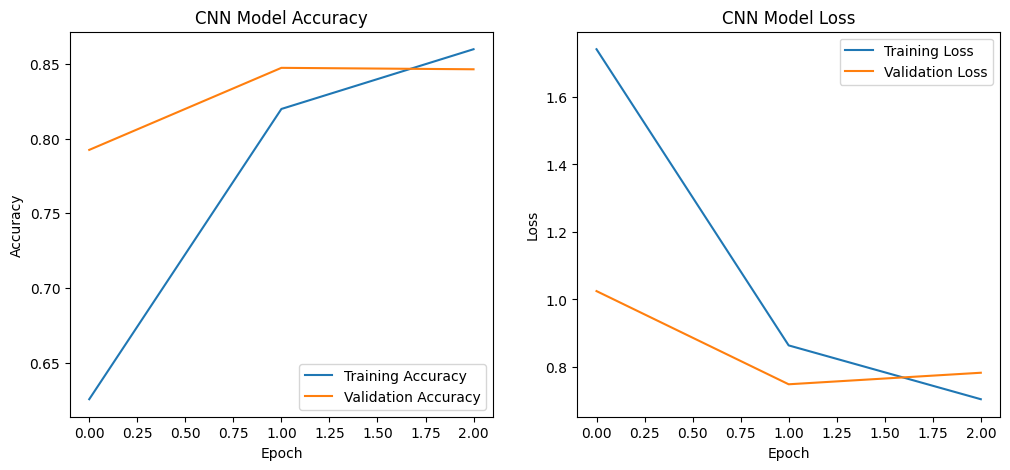

In [ ]:
# Train CNN Model
print("Training CNN Model...")
history_cnn = cnn_model.fit(dataset_train, validation_data=dataset_test, epochs=10, callbacks=[keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)])
plot_metrics(history_cnn, "CNN Model")

Training MLP Model...
Epoch 1/3
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 123s 106ms/step - accuracy: 0.1729 - loss: 3.3249 - val_accuracy: 0.1959 - val_loss: 2.3082 - learning_rate: 5.0000e-04
Epoch 2/3
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 142s 106ms/step - accuracy: 0.1892 - loss: 2.2840 - val_accuracy: 0.1959 - val_loss: 2.2115 - learning_rate: 5.0000e-04
Epoch 3/3
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 131s 96ms/step - accuracy: 0.1892 - loss: 2.2247 - val_accuracy: 0.1959 - val_loss: 2.1976 - learning_rate: 5.0000e-04


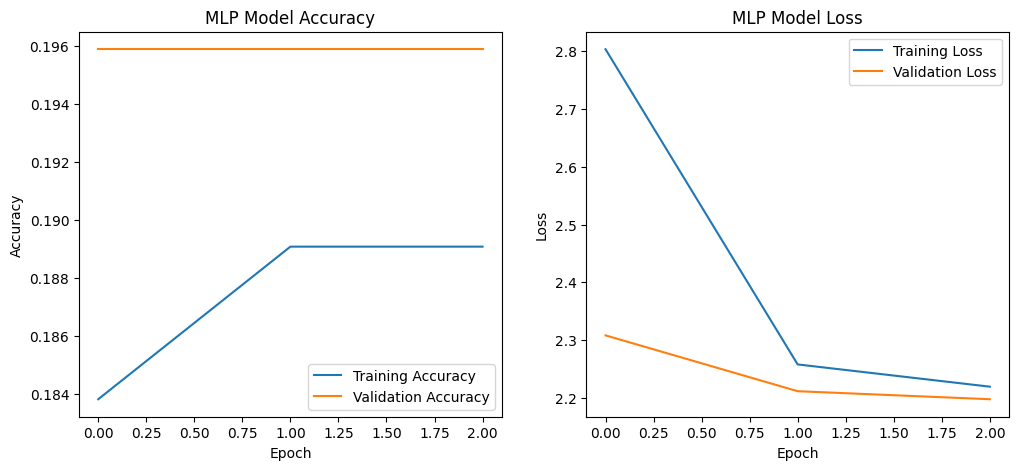

In [ ]:
# Train MLP Model
print("Training MLP Model...")
history_mlp = mlp_model.fit(dataset_train, validation_data=dataset_test, epochs=10, callbacks=[keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)])
plot_metrics(history_mlp, "MLP Model")

# PyTorch
CNN & MLP model Using SVHN Datasets

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import warnings
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.utils.data.dataloader")
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load SVHN dataset
dataset_train = datasets.SVHN(root="./data", split='train', transform=transform, download=True)
dataset_test = datasets.SVHN(root="./data", split='test', transform=transform, download=True)

# Create data loaders
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False, num_workers=4)

100%|██████████| 182M/182M [00:03<00:00, 52.0MB/s]
100%|██████████| 64.3M/64.3M [00:11<00:00, 5.63MB/s]


In [ ]:
# Define CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

# Define MLP Model
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

In [ ]:
# Training function
def train_model(model, train_loader, test_loader, num_epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_acc, val_acc = [], []
    train_loss, val_loss = [], []

    for epoch in range(num_epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0
        all_preds, all_labels = [], []

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        train_loss.append(total_loss / len(train_loader))
        train_acc.append(accuracy_score(all_labels, all_preds))

        # Validation phase
        model.eval()
        val_correct, val_total, val_loss_epoch = 0, 0, 0
        val_preds, val_labels = [], []

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss_epoch += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

                val_preds.extend(predicted.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        val_loss.append(val_loss_epoch / len(test_loader))
        val_acc.append(accuracy_score(val_labels, val_preds))

        precision = precision_score(val_labels, val_preds, average='macro')
        recall = recall_score(val_labels, val_preds, average='macro')
        f1 = f1_score(val_labels, val_preds, average='macro')
        auc = roc_auc_score(np.eye(10)[val_labels], np.eye(10)[val_preds], multi_class='ovr')

        print(f"Epoch {epoch+1}/{num_epochs}: Accuracy: {val_acc[-1]:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUC: {auc:.4f}")

    # Plot accuracy and loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs+1), train_acc, label='Training Accuracy')
    plt.plot(range(1, num_epochs+1), val_acc, label='Validation Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training vs Validation Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs+1), train_loss, label='Training Loss')
    plt.plot(range(1, num_epochs+1), val_loss, label='Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training vs Validation Loss")

    plt.show()

Training CNN Model...
Epoch 1/5: Accuracy: 0.8604, Precision: 0.8553, Recall: 0.8415, F1-Score: 0.8461, AUC: 0.9129
Epoch 2/5: Accuracy: 0.8765, Precision: 0.8726, Recall: 0.8595, F1-Score: 0.8640, AUC: 0.9227
Epoch 3/5: Accuracy: 0.8943, Precision: 0.8909, Recall: 0.8810, F1-Score: 0.8853, AUC: 0.9345
Epoch 4/5: Accuracy: 0.8926, Precision: 0.8858, Recall: 0.8837, F1-Score: 0.8843, AUC: 0.9358
Epoch 5/5: Accuracy: 0.8920, Precision: 0.8812, Recall: 0.8824, F1-Score: 0.8803, AUC: 0.9352


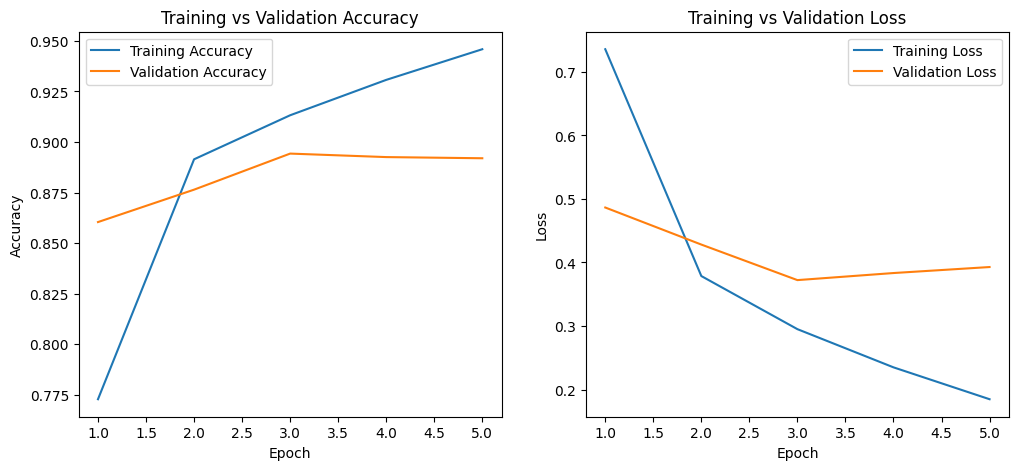

In [ ]:
# Train CNN model
cnn_model = CNNModel()
print("Training CNN Model...")
train_model(cnn_model, train_loader, test_loader)

Training MLP Model...
Epoch 1/5: Accuracy: 0.6647, Precision: 0.6828, Recall: 0.6195, F1-Score: 0.6391, AUC: 0.7904
Epoch 2/5: Accuracy: 0.7323, Precision: 0.7230, Recall: 0.7048, F1-Score: 0.7088, AUC: 0.8372
Epoch 3/5: Accuracy: 0.7515, Precision: 0.7511, Recall: 0.7233, F1-Score: 0.7323, AUC: 0.8476
Epoch 4/5: Accuracy: 0.7750, Precision: 0.7667, Recall: 0.7476, F1-Score: 0.7531, AUC: 0.8611
Epoch 5/5: Accuracy: 0.7674, Precision: 0.7581, Recall: 0.7479, F1-Score: 0.7495, AUC: 0.8608


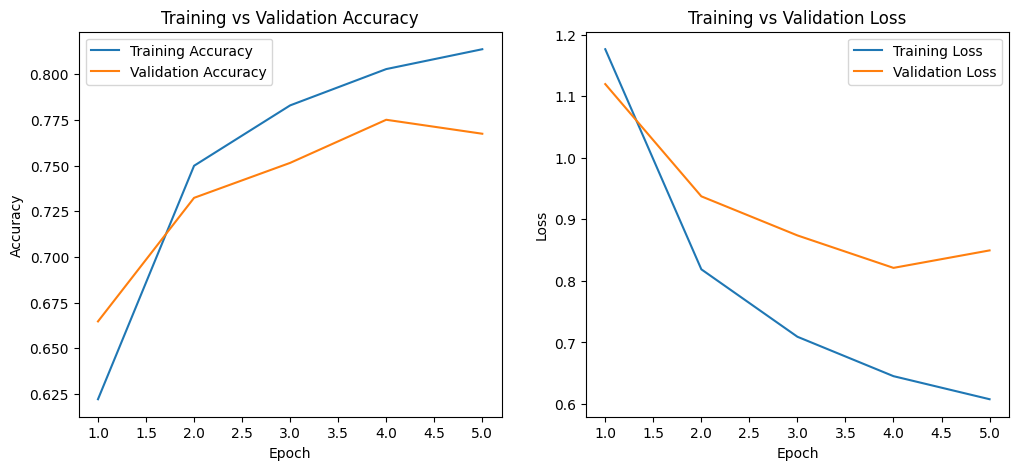

In [ ]:
# Train MLP model
mlp_model = MLPModel()
print("Training MLP Model...")
train_model(mlp_model, train_loader, test_loader)